In [2]:
import pandas as pd

# Carica il dataset
#url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
url = "titanic.csv"
titanic_data = pd.read_csv(url)
print(type(titanic_data))
titanic_data.head()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [41]:
# quante righe e quante colonne 
print(titanic_data.shape)


(887, 8)


In [42]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
titanic_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [43]:
Pclass_series = titanic_data['Pclass'].value_counts()
Pclass_series


3    487
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
Pclass_series.index

Int64Index([3, 1, 2], dtype='int64')

In [17]:
Pclass_series.values

array([487, 216, 184], dtype=int64)

1    216
2    184
3    487
Name: Pclass, dtype: int64


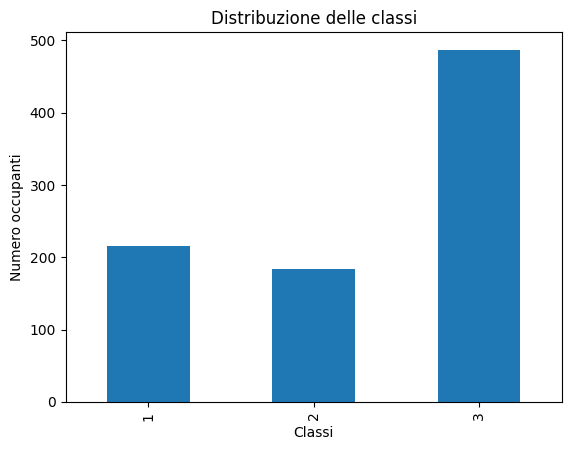

In [44]:
import matplotlib.pyplot as plt
# Creare il diagramma a barre
# Creare una Series con gli indici e i valori forniti

# Ordinare la Series in base agli indici
data_sorted = Pclass_series.sort_index()
print(data_sorted)

# Creare il diagramma a barre
data_sorted.plot(kind='bar')

# Aggiungere le etichette agli assi
plt.xlabel('Classi')
plt.ylabel('Numero occupanti')

# Aggiungere il titolo al diagramma
plt.title('Distribuzione delle classi')

# Mostrare il diagramma
plt.show()

In [45]:
survived_series = titanic_data['Survived'].value_counts()
survived_series


0    545
1    342
Name: Survived, dtype: int64

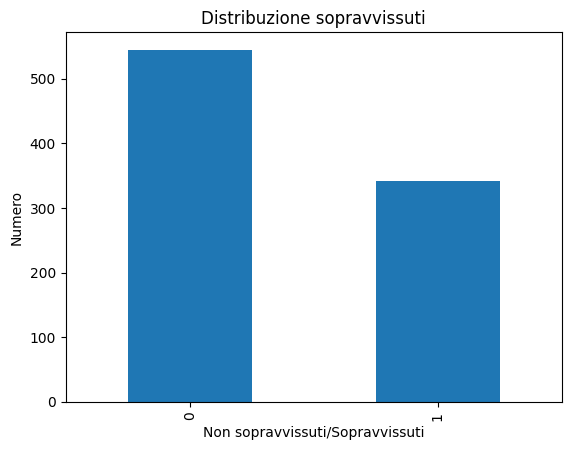

In [46]:
# Creare il diagramma a barre
survived_series.plot(kind='bar')

# Aggiungere le etichette agli assi
plt.xlabel('Non sopravvissuti/Sopravvissuti')
plt.ylabel('Numero')

# Aggiungere il titolo al diagramma
plt.title('Distribuzione sopravvissuti')

# Mostrare il diagramma
plt.show()

In [47]:
sex_series = titanic_data['Sex'].value_counts()

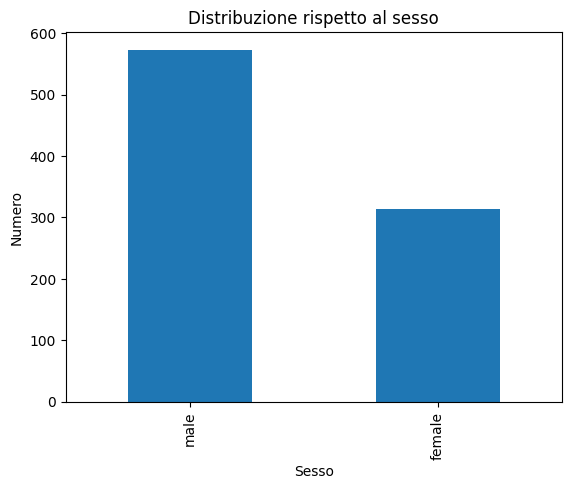

In [48]:
sex_series.plot(kind='bar')

# Aggiungere le etichette agli assi
plt.xlabel('Sesso')
plt.ylabel('Numero')

# Aggiungere il titolo al diagramma
plt.title('Distribuzione rispetto al sesso')

# Mostrare il diagramma
plt.show()

In [35]:
titanic_data['Age'].mean()

29.471443066516347

In [36]:
# passeggeri con dati mancanti, situazione ideale, nella realtà non è così
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [37]:
# Seleziona solo colonne numeriche per il calcolo della correlazione
numeric_columns = titanic_data.select_dtypes(include=['number'])
print("\nCorrelazione tra le colonne numeriche:")
print(numeric_columns.corr())


Correlazione tra le colonne numeriche:
                         Survived    Pclass       Age  \
Survived                 1.000000 -0.336528 -0.059665   
Pclass                  -0.336528  1.000000 -0.391492   
Age                     -0.059665 -0.391492  1.000000   
Siblings/Spouses Aboard -0.037082  0.085026 -0.297669   
Parents/Children Aboard  0.080097  0.020252 -0.193741   
Fare                     0.256179 -0.548919  0.112329   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                               -0.037082                 0.080097   
Pclass                                  0.085026                 0.020252   
Age                                    -0.297669                -0.193741   
Siblings/Spouses Aboard                 1.000000                 0.414244   
Parents/Children Aboard                 0.414244                 1.000000   
Fare                                    0.158839                 0.215470   

                    

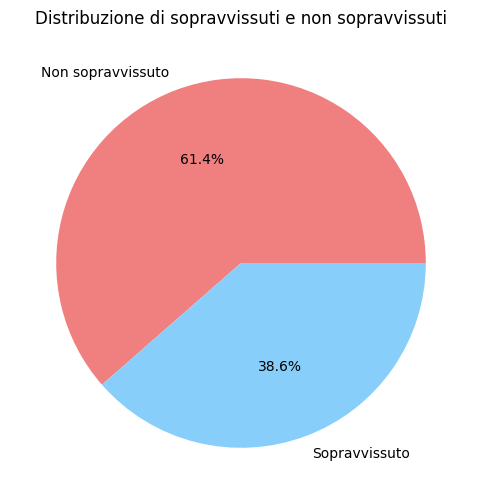

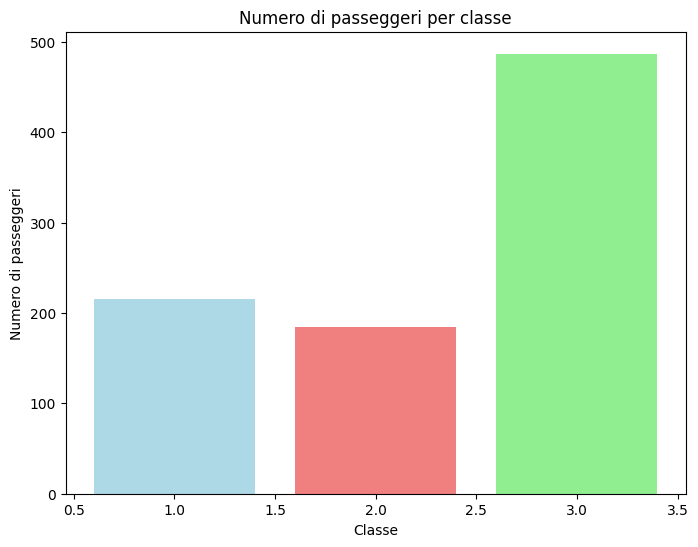

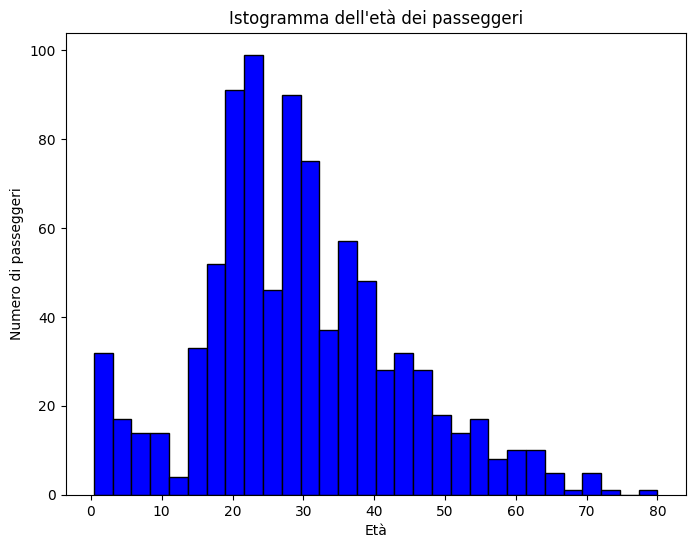

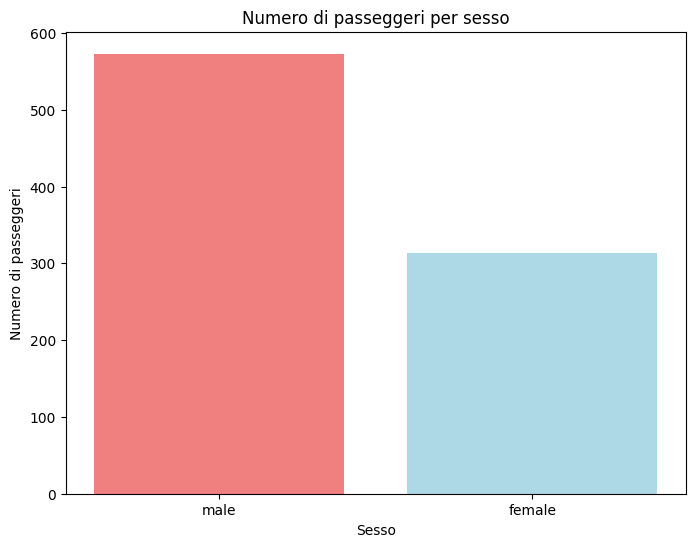

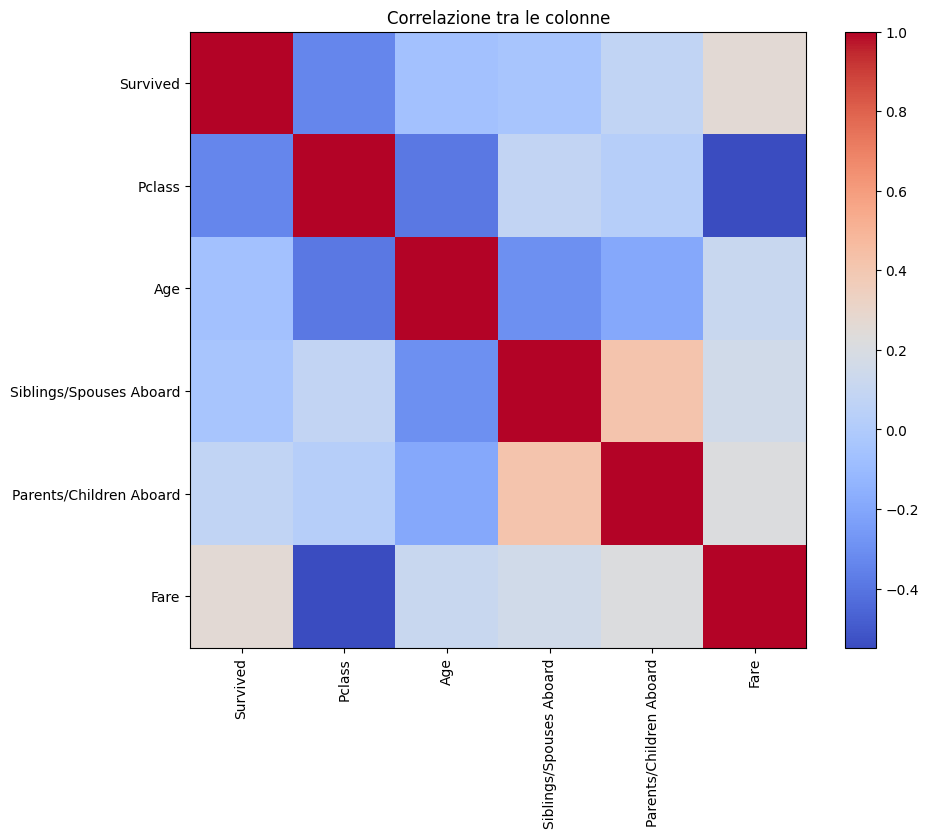

In [49]:
# Rimuovi colonne non numeriche per l'analisi
titanic_data_numeric = titanic_data.select_dtypes(include=['number'])

# Grafico a torta per la distribuzione di sopravvissuti e non sopravvissuti
plt.figure(figsize=(6, 6))
survived_counts = titanic_data['Survived'].value_counts()
plt.pie(survived_counts, labels=['Non sopravvissuto', 'Sopravvissuto'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribuzione di sopravvissuti e non sopravvissuti')
plt.show()

# Grafico a barre per il numero di passeggeri per classe
plt.figure(figsize=(8, 6))
class_counts = titanic_data['Pclass'].value_counts()
plt.bar(class_counts.index, class_counts, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Numero di passeggeri per classe')
plt.xlabel('Classe')
plt.ylabel('Numero di passeggeri')
plt.show()

# Istogramma dell'età dei passeggeri
plt.figure(figsize=(8, 6))
plt.hist(titanic_data['Age'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Istogramma dell\'età dei passeggeri')
plt.xlabel('Età')
plt.ylabel('Numero di passeggeri')
plt.show()

# Grafico a barre per il numero di passeggeri per sesso
plt.figure(figsize=(8, 6))
sex_counts = titanic_data['Sex'].value_counts()
plt.bar(sex_counts.index, sex_counts, color=['lightcoral', 'lightblue'])
plt.title('Numero di passeggeri per sesso')
plt.xlabel('Sesso')
plt.ylabel('Numero di passeggeri')
plt.show()

# Correlazione tra le colonne numeriche con una heatmap
plt.figure(figsize=(10, 8))
corr_matrix = titanic_data_numeric.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlazione tra le colonne')
plt.show()

In [50]:
# Filtra i dati per sopravvissuti
sopravvissuti = titanic_data[titanic_data['Survived'] == 1]

# Conta il numero di passeggeri maschi sopravvissuti
maschi_sopravvissuti = sopravvissuti[sopravvissuti['Sex'] == 'male'].shape[0]

# Conta il numero di passeggeri femmine sopravvissute
femmine_sopravvissute = sopravvissuti[sopravvissuti['Sex'] == 'female'].shape[0]

# Stampare i risultati
print(f"Numero di passeggeri maschi sopravvissuti: {maschi_sopravvissuti}")
print(f"Numero di passeggeri femmine sopravvissute: {femmine_sopravvissute}")

Numero di passeggeri maschi sopravvissuti: 109
Numero di passeggeri femmine sopravvissute: 233


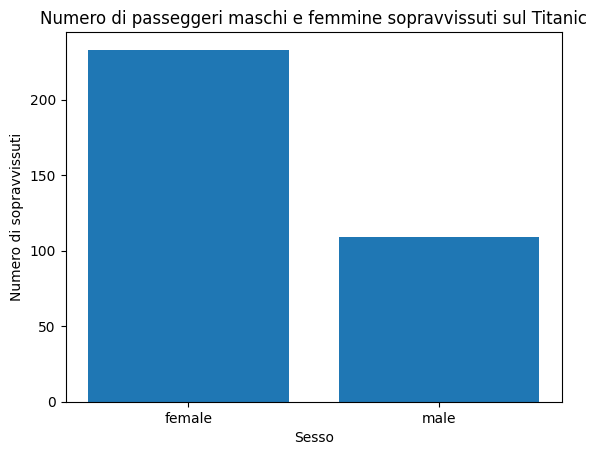

In [51]:
# Filtra i dati per sopravvissuti
sopravvissuti = titanic_data[titanic_data['Survived'] == 1]

# Conta il numero di passeggeri maschi e femmine sopravvissuti
conteggio_sopravvissuti = sopravvissuti['Sex'].value_counts()

# Crea il diagramma a barre
plt.bar(conteggio_sopravvissuti.index, conteggio_sopravvissuti)

# Aggiungi etichette al diagramma
plt.xlabel('Sesso')
plt.ylabel('Numero di sopravvissuti')
plt.title('Numero di passeggeri maschi e femmine sopravvissuti sul Titanic')

# Mostra il diagramma
plt.show()

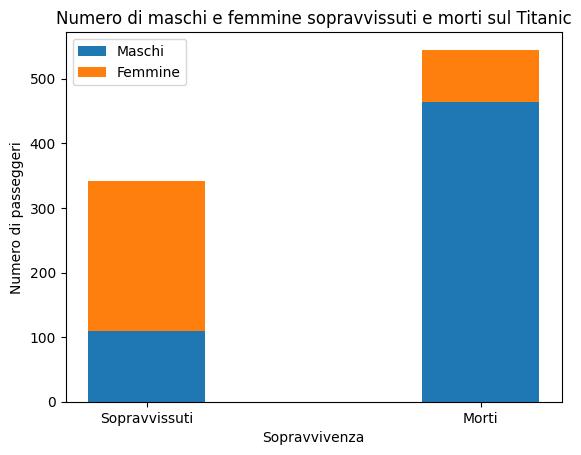

In [52]:
# Filtra i dati per sopravvissuti
sopravvissuti = titanic_data[titanic_data['Survived'] == 1]
non_sopravvissuti = titanic_data[titanic_data['Survived'] == 0]

# Conta il numero di maschi e femmine sopravvissuti e morti
conteggio_maschi = [sopravvissuti[sopravvissuti['Sex'] == 'male'].shape[0], non_sopravvissuti[non_sopravvissuti['Sex'] == 'male'].shape[0]]
conteggio_femmine = [sopravvissuti[sopravvissuti['Sex'] == 'female'].shape[0], non_sopravvissuti[non_sopravvissuti['Sex'] == 'female'].shape[0]]

# Crea il diagramma a barre sovrapposti
bar_width = 0.35
index = range(2)

plt.bar(index, conteggio_maschi, width=bar_width, label='Maschi')
plt.bar(index, conteggio_femmine, width=bar_width, label='Femmine', bottom=conteggio_maschi)

# Aggiungi etichette al diagramma
plt.xlabel('Sopravvivenza')
plt.ylabel('Numero di passeggeri')
plt.title('Numero di maschi e femmine sopravvissuti e morti sul Titanic')
plt.xticks(index, ['Sopravvissuti', 'Morti'])
plt.legend()

# Mostra il diagramma
plt.show()

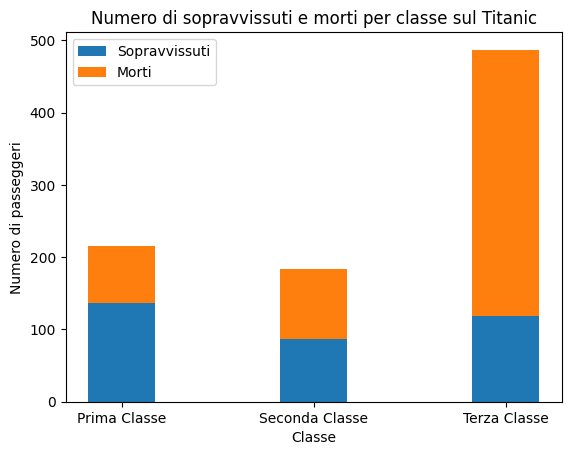

In [53]:
# Conta il numero di sopravvissuti e morti per ciascuna classe
conteggio_classe_sopravvissuti = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass').size()
conteggio_classe_morti = titanic_data[titanic_data['Survived'] == 0].groupby('Pclass').size()

# Crea il diagramma a barre sovrapposte
bar_width = 0.35
index = range(1, 4)

plt.bar(index, conteggio_classe_sopravvissuti, width=bar_width, label='Sopravvissuti')
plt.bar(index, conteggio_classe_morti, width=bar_width, label='Morti', bottom=conteggio_classe_sopravvissuti)

# Aggiungi etichette al diagramma
plt.xlabel('Classe')
plt.ylabel('Numero di passeggeri')
plt.title('Numero di sopravvissuti e morti per classe sul Titanic')
plt.xticks(index, ['Prima Classe', 'Seconda Classe', 'Terza Classe'])
plt.legend()

# Mostra il diagramma
plt.show()

In [5]:
# Utilizza la funzione groupBy per raggruppare i dati in base alla colonna 'Pclass' e 'Sex'
grouped_data = titanic_data.groupby(['Pclass', 'Sex'], as_index=False)

# Calcola la media dell'età per ciascun gruppo
average_age = grouped_data['Age'].mean()

# Visualizza i risultati
print(average_age)

   Pclass     Sex        Age
0       1  female  35.255319
1       1    male  41.511639
2       2  female  28.980263
3       2    male  30.493796
4       3  female  22.135417
5       3    male  26.470612


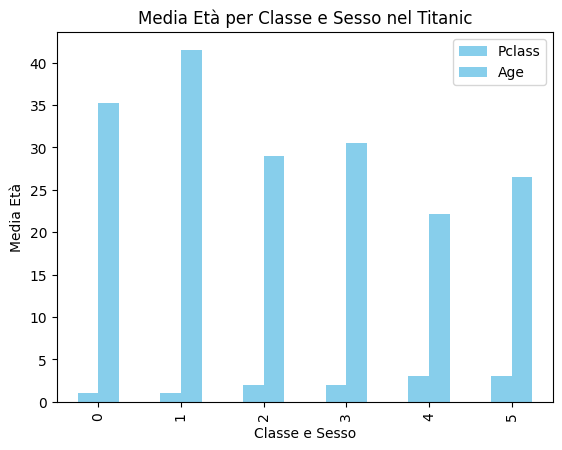

In [7]:
import matplotlib.pyplot as plt
# Utilizza la media dell'età calcolata in precedenza
average_age.plot(kind='bar', color='skyblue')

# Aggiungi etichette e titoli
plt.xlabel('Classe e Sesso')
plt.ylabel('Media Età')
plt.title('Media Età per Classe e Sesso nel Titanic')

# Mostra il grafico
plt.show()

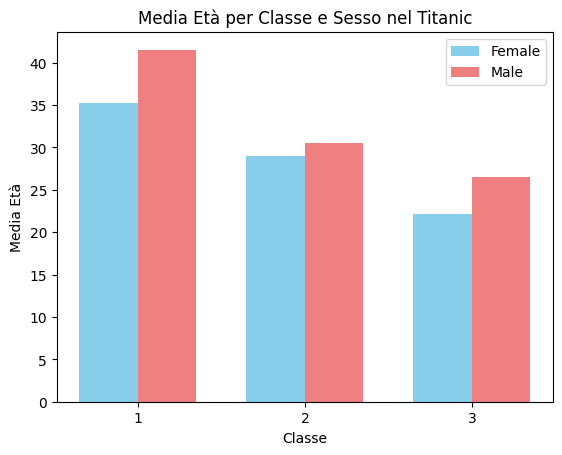

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Raggruppa i dati per classe e sesso e calcola la media dell'età
grouped_data = titanic_data.groupby(['Pclass', 'Sex'])
average_age = grouped_data['Age'].mean().unstack()

# Crea un diagramma a barre affiancate
width = 0.35  # Larghezza delle barre
index = np.arange(len(average_age))  # Posizioni sull'asse x

fig, ax = plt.subplots()
bar1 = ax.bar(index - width/2, average_age['female'], width, label='Female', color='skyblue')
bar2 = ax.bar(index + width/2, average_age['male'], width, label='Male', color='lightcoral')

# Aggiungi etichette e titoli
ax.set_xlabel('Classe')
ax.set_ylabel('Media Età')
ax.set_title('Media Età per Classe e Sesso nel Titanic')
ax.set_xticks(index)
ax.set_xticklabels(average_age.index)
ax.legend()

# Mostra il grafico
plt.show()

In [9]:
# Raggruppa i dati per classe e sesso e conta il numero di righe in ciascun gruppo
passenger_count = titanic_data.groupby(['Pclass', 'Sex']).size().unstack()

# Visualizza i risultati
print(passenger_count)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   343


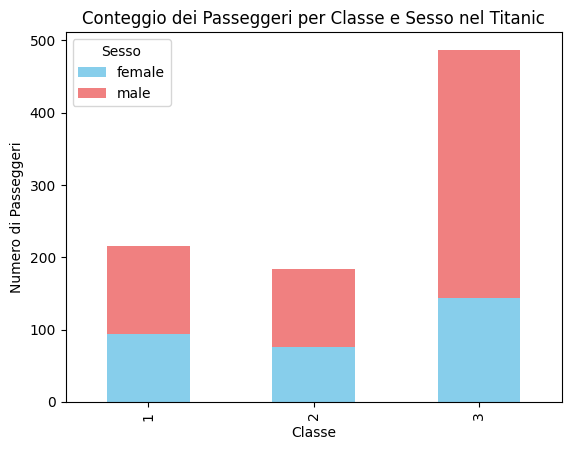

In [10]:
import matplotlib.pyplot as plt

# Crea un diagramma a barre impilato
passenger_count.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Aggiungi etichette e titoli
plt.xlabel('Classe')
plt.ylabel('Numero di Passeggeri')
plt.title('Conteggio dei Passeggeri per Classe e Sesso nel Titanic')
plt.legend(title='Sesso', loc='upper left')

# Mostra il grafico
plt.show()


In [12]:
#Per raggruppare i passeggeri in base allo stato civile (sposati con figli o non sposati) e analizzare chi è sopravvissuto e chi no, puoi seguire questi passaggi utilizzando il dataset del Titanic:

# Aggiungi una colonna per rappresentare lo stato civile
titanic_data['FamilyStatus'] = np.where((titanic_data['Siblings/Spouses Aboard'] > 0) | (titanic_data['Parents/Children Aboard'] > 0), 'Sposato con Figli', 'Non Sposato')

# Raggruppa per stato civile e sopravvivenza e conta il numero di passeggeri in ciascun gruppo
survival_by_family_status = titanic_data.groupby(['FamilyStatus', 'Survived']).size().unstack()

# Visualizza i risultati
print(survival_by_family_status)

Survived             0    1
FamilyStatus               
Non Sposato        370  163
Sposato con Figli  175  179


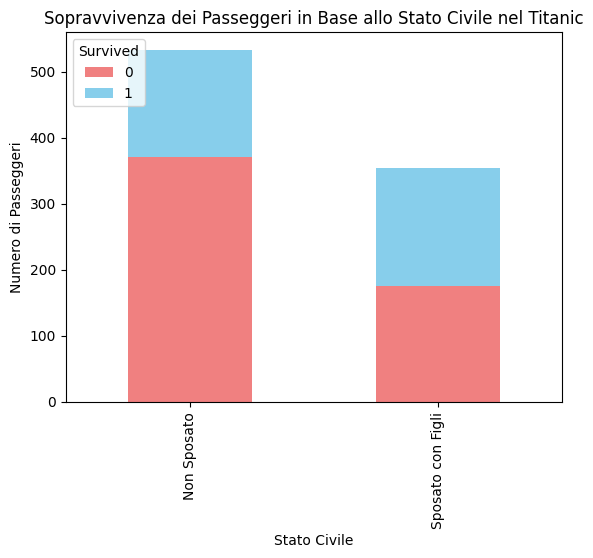

In [13]:
# Crea un diagramma a barre impilato
survival_by_family_status.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])

# Aggiungi etichette e titoli
plt.xlabel('Stato Civile')
plt.ylabel('Numero di Passeggeri')
plt.title('Sopravvivenza dei Passeggeri in Base allo Stato Civile nel Titanic')
plt.legend(title='Survived', loc='upper left')

# Mostra il grafico
plt.show()